### Usando DeepFace para detectar caras, raza, edad, estado de ánimo, género y chequeo de imágenes

In [1]:
from deepface import DeepFace
import json
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
result = DeepFace.verify(img1_path="./resources/messi1.jpg", img2_path="./resources/messi2.jpg")
print(json.dumps(result, indent=2))

{
  "verified": false,
  "distance": 0.7697899821825067,
  "threshold": 0.68,
  "model": "VGG-Face",
  "detector_backend": "opencv",
  "similarity_metric": "cosine",
  "facial_areas": {
    "img1": {
      "x": 76,
      "y": 98,
      "w": 168,
      "h": 168
    },
    "img2": {
      "x": 148,
      "y": 46,
      "w": 59,
      "h": 59
    }
  },
  "time": 5.86
}


In [3]:
result = DeepFace.verify(img1_path="./resources/messi1.jpg", img2_path="./resources/messi3.jpg")
print(json.dumps(result, indent=2))

{
  "verified": true,
  "distance": 0.6732899062479218,
  "threshold": 0.68,
  "model": "VGG-Face",
  "detector_backend": "opencv",
  "similarity_metric": "cosine",
  "facial_areas": {
    "img1": {
      "x": 76,
      "y": 98,
      "w": 168,
      "h": 168
    },
    "img2": {
      "x": 113,
      "y": 58,
      "w": 54,
      "h": 54
    }
  },
  "time": 0.84
}


In [4]:
result = DeepFace.verify(img1_path="./resources/messi2.jpg", img2_path="./resources/messi3.jpg")
print(json.dumps(result, indent=2))

{
  "verified": true,
  "distance": 0.5352782648019732,
  "threshold": 0.68,
  "model": "VGG-Face",
  "detector_backend": "opencv",
  "similarity_metric": "cosine",
  "facial_areas": {
    "img1": {
      "x": 148,
      "y": 46,
      "w": 59,
      "h": 59
    },
    "img2": {
      "x": 113,
      "y": 58,
      "w": 54,
      "h": 54
    }
  },
  "time": 0.81
}


In [5]:
dfs = DeepFace.find(img_path="./resources/messi1.jpg", db_path="./db")
print(dfs)

24-02-01 08:26:44 - There are 5 representations found in representations_vgg_face.pkl
24-02-01 08:26:44 - find function lasts 0.48871874809265137 seconds
[          identity  target_x  target_y  target_w  target_h  source_x  \
0  ./db/messi3.jpg       113        58        54        54        76   

   source_y  source_w  source_h  threshold  distance  
0        98       168       168       0.68   0.67329  ]


In [6]:
objs = DeepFace.analyze(img_path="./resources/messi1.jpg")
print(json.dumps(objs, indent=2))

Action: race: 100%|██████████| 4/4 [00:09<00:00,  2.31s/it]   

[
  {
    "emotion": {
      "angry": 0.09319647850547987,
      "disgust": 0.003505185614420326,
      "fear": 3.260365112380372,
      "happy": 3.774901774537352,
      "sad": 2.744710490738095,
      "surprise": 0.34854019096759664,
      "neutral": 89.77477672400752
    },
    "dominant_emotion": "neutral",
    "region": {
      "x": 76,
      "y": 98,
      "w": 168,
      "h": 168
    },
    "face_confidence": 8.139864970871713,
    "age": 30,
    "gender": {
      "Woman": 0.00045869278437749017,
      "Man": 99.9995470046997
    },
    "dominant_gender": "Man",
    "race": {
      "asian": 7.781901558701065e-05,
      "indian": 0.0016507336113136262,
      "black": 5.65872007030066e-06,
      "white": 95.70133686065674,
      "middle eastern": 2.6630690321326256,
      "latino hispanic": 1.6338586807250977
    },
    "dominant_race": "white"
  }
]


### Dibujar cara usando CV2

In [7]:
# Cargar la imagen original
img_path = "./resources/messi1.jpg"
original_image = cv2.imread(img_path)


In [8]:
# Obtener las coordenadas y dimensiones de la región facial desde el diccionario
x = objs[0]['region']['x']
y = objs[0]['region']['y']
w = objs[0]['region']['w']
h = objs[0]['region']['h']

In [9]:
# Dibujar un rectángulo alrededor de la región facial en la imagen original
cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # (0, 255, 0) representa el color verde, y 2 es el grosor del rectángulo

array([[[204, 193, 189],
        [206, 195, 191],
        [207, 196, 192],
        ...,
        [212, 203, 199],
        [212, 203, 199],
        [212, 203, 199]],

       [[206, 195, 191],
        [206, 195, 191],
        [207, 196, 192],
        ...,
        [212, 203, 199],
        [212, 203, 199],
        [213, 204, 200]],

       [[208, 197, 193],
        [207, 196, 192],
        [207, 196, 192],
        ...,
        [212, 203, 199],
        [212, 203, 199],
        [213, 204, 200]],

       ...,

       [[ 64,   2, 145],
        [ 65,   6, 141],
        [ 60,   3, 136],
        ...,
        [ 80,  11, 162],
        [ 73,   4, 155],
        [ 70,   1, 152]],

       [[ 67,   0, 146],
        [ 55,   2, 135],
        [ 59,   1, 136],
        ...,
        [ 78,  13, 159],
        [ 73,   8, 154],
        [ 71,   4, 149]],

       [[ 70,   2, 149],
        [ 55,   2, 135],
        [ 59,   1, 136],
        ...,
        [ 79,  14, 160],
        [ 76,   8, 155],
        [ 72,   5, 150]]

In [10]:
# Mostrar o guardar la imagen con el rectángulo resaltando la región facial
cv2.imshow("Cara Resaltada", original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# Opcional: Guardar la imagen con el rectángulo resaltado
cv2.imwrite("./resources/out_image.jpg", original_image)

True

### Dibujar cara usando PIL

In [12]:
# Cargar la imagen original
img_path = "./resources/messi1.jpg"
original_image = Image.open(img_path)

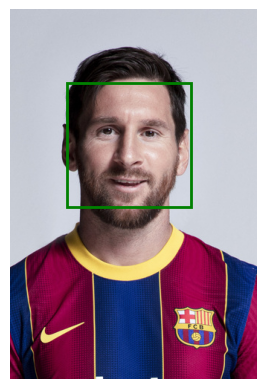

In [13]:
# Mostrar la imagen con el rectángulo resaltando la región facial
plt.imshow(original_image)
plt.gca().add_patch(Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none'))
plt.axis('off')  # Desactivar los ejes
plt.show()